## **Analyzing the Iris dataset using Python**

## 🔸Part 1 : Initial Data Exploration and Visualization


### Import Python packages:

In Python, a library is a set of pre-written code that provides specific functions and tools that can be used to perform tasks and solve problems.  

Import is a command that brings the library or package into the program.  

In [29]:
# dataframes library
import pandas as pd
# machine Learning library that contains datasets.
import sklearn as skl 
# plotting library
import matplotlib.pyplot as plt
# patch package in matplotlib to add objects to the plots
from matplotlib.patches import Patch
# python library for creating iterators to produce complex iterators.  
from itertools import combinations
# data visualization library
import seaborn as sns

### 🔹 Output a summary of each Iris dataset variable to a single text file  


* Load dataset  

Loading data refers to the process of importing a dataset from an external source (such as a CSV file, web resource ..) into the programming environment  
Python then is used to open the file and store the information in a variable to be read and then used for analysis. 

In [30]:
# read iris dataset from current repository as a pandas data frame.
iris_data = pd.read_csv('iris.data')
#show
iris_data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
# the data frame was created with just data values, so I added column names to simplify reading
# refering to the documentation file 'iris.names' in this repository. I used the listed attributes to identify the corresponding columns names.

# assgn the columns names
column_names = ['sepal length in cm' , 'sepal width in cm' , 'petal length in cm' , 'petal width in cm', 'class']
column_names


['sepal length in cm',
 'sepal width in cm',
 'petal length in cm',
 'petal width in cm',
 'class']

In [32]:
# now that I identified the column names, I add them so I can identify the columns easily.
iris_data = pd.read_csv('iris.data', names= column_names)
# show dataframe
iris_data


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


* General dataset summary  

A summary of dataset variables, or, 'descriptive statistics summary' provides metrics that help in understanding the main characteristcs of each variable within the data set.  

In [33]:
# summary of the 4 variables of Iris dataset.
# The describe() method returns description of the data in the dataframe. As the dataframe contains numerical data, the description contains these information for each column: 
# count, mean, std, min, 25%, 50%, 75%, max
iris_data.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* Descriptive summary explained  

    - mean  
The mean of a values in a list, is the sum of all the elements divided by the number of items in that list. 

    -  minimum  
The min refers to the minimal value of the dataset  

    - maximum  
The max refers to the maximal value of the dataset    

    - standard deviation  
Measures how spread out the data is, where low values mean that data is close to the mean, but high values mean that the data is more spread out and the distribution is wide.  

    - quartile:  
Are % numbers that split the data into four equal parts. 1st quartile (Q1:25%) is like where the lower values end, the middle one is the median(Q2:50%), the 3rd quatile (Q3:75%) is where the higher values start.  

* Create a Summary of each data set variable

In [34]:
# loop through the columns in order to save them into txt files.
# reference : https://stackoverflow.com/questions/28218698/how-to-iterate-over-columns-of-a-pandas-dataframe#:~:text=We%20can%20use%20Python%27s%20list%20slicing%20easily%20to%20slice%20df.columns%20according%20to%20our%20needs.%20For%20eg%2C%20to%20iterate%20over%20all%20columns%20but%20the%20first%20one%2C%20we%20can%20do%3A

# I skip the class by applying a negative indexing method.
for column in iris_data.columns[:-1]:  
    # summary of each column
    summary = iris_data[column].describe()
    # create a file for each column, add the file name and format
    # f-string formatting generates a filename based on each column name.
    file_name = f"summary of {column}.txt"
    # open each file created previosuly, and overwrite the summary of each variable accordingly
    with open(file_name, "w") as f:
        f.write(summary.to_string())

### 🔹 Save a histogram of each variable to png files  

*  Definition of Histograms  

Histogram is a chart type that shows using bars, how often different values appear in a dataset and how theyre spread out.  
As ***a univariate*** visualization tool, the histogram shows one variable at a time, it tells how values within a range ( column, dataset) are spread out.


*   Create Histograms  

In [35]:
# to simplify the reading and coding, assign a variable to each feature of the data set.
sepal_length    = iris_data['sepal length in cm']
sepal_width     = iris_data['sepal width in cm']
petal_length    = iris_data['petal length in cm']
petal_width     = iris_data['petal width in cm']

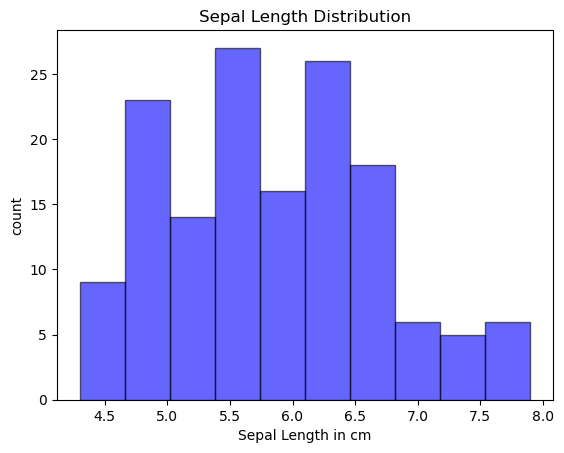

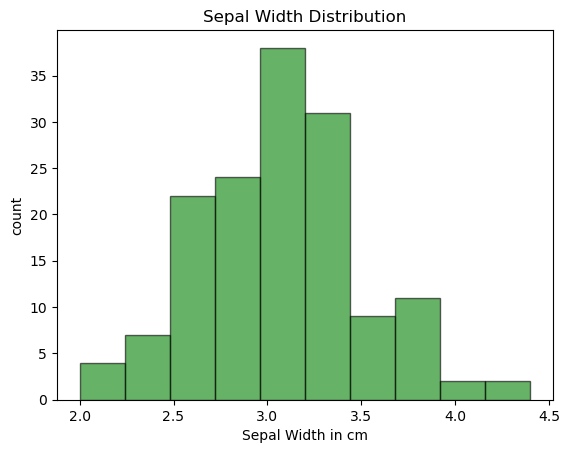

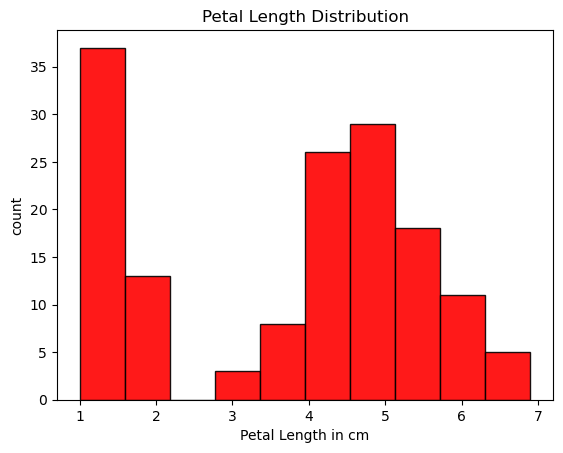

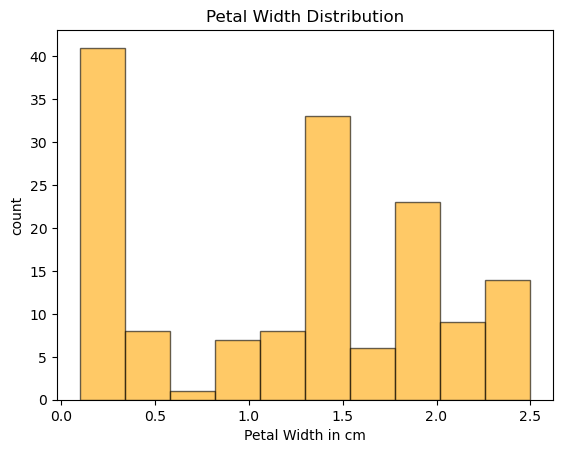

<Figure size 640x480 with 0 Axes>

In [36]:
# plot a histogram for each variable
# reference : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#:~:text=pyplot.hist(x%2C%20bins%3DNone%2C

# cutomizing different parameters of the function 
# sepal_length : the data to be plotted
# ec='k'       : adds a black edge color to the bars
# color='  '   : matches the fill color of the bars  
# alpha=0.6    : makes the bars slightly transparent


# 1st histogram
plt.hist(sepal_length, ec='k', color='blue', alpha=0.6)
# add x label
# reference : https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend:~:text=in%20increasing%20order.-,Axis%20labels%2C%20title%2C%20and%20legend,-%23
plt.xlabel("Sepal Length in cm")
# add y label
plt.ylabel("count")
# add title
plt.title("Sepal Length Distribution")
# save histogram in .png file 
# reference : # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig("histogram of sepal length.png")
# show the histogram in this notebook
plt.show()
# clear the current figure, this leaves the plot window space open so it's reused by other plots, to make sure no overlapping happens when saving the remaining histograms
# reference : https://www.geeksforgeeks.org/difference-between-cla-clf-and-close-methods-in-matplotlib/
plt.clf()

# 2nd histogram
plt.hist(sepal_width, ec='k', color='green', alpha=0.6)
# add x label
plt.xlabel("Sepal Width in cm")
# add y label
plt.ylabel("count")
# add title
plt.title("Sepal Width Distribution")
# save
plt.savefig("histogram of sepal width.png")
#print
plt.show()
#clear the current figure.
plt.clf()

# 3rd histogram
plt.hist(petal_length, ec='k', color='red', alpha=0.9)
# add x label
plt.xlabel("Petal Length in cm")
# add y label
plt.ylabel("count")
# add title
plt.title("Petal Length Distribution")
# save
plt.savefig("histogram of petal length.png")
#print
plt.show()
##clear the current figure.
plt.clf()

# 4th histogram
plt.hist(petal_width, ec='k', color='orange', alpha=0.6)
# add x label
plt.xlabel("Petal Width in cm")
# add why label
plt.ylabel("count")
# add title
plt.title("Petal Width Distribution")
# save
plt.savefig("histogram of petal width.png")
#print
plt.show()
#clear the current figure.
plt.clf()


* Histograms analysis :  


    - sepal length shows that most of the data points are concentrated around the 5-6 cm range, which is also explained by the lower standard deviation of 0.83. This confirms that most data values are close to the mean.  
    - sepal width histogram shows relatively normal distribution, with standard deviation of 0.43 which means that values are also close to the mean.  
    - petal length shows that most petals are medium sized as they're ranging between 4 and 6 cm and only few flowers has extremely long petals.   
    - petal width shows a more spread out data compared to other variables, it ranges from the narrowest petal (min value of 0.10 cm) to the widest (max value of 2.5 cm )
    

### 🔹 Output a scatter plot of each pair of variables

*   Definition of scatter plot  

A scatter plot is a type of graph where dots represent values for two different numeric variables.  
As a ***bivariate*** visualization tool, it's very useful in exploring the relationship between two variables, where each variable is plotted to one of thee axes. 

*   Identify pairs count within data set variables

In [37]:
# finding how many pairs of variables before coding the scatter plots.
# I did manually count 6 pairs across al the 4 variables, but I saw it a chance to learn more, I then consulted the documentation.
# the function below, generates the pairs count within a data set, which can be very helpful when dealing with larger data sets.

# the input list used to find the combinations.
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# imported in cell 1 itertools package to apply the combination method into python.
# itertools helps to create and work with repeated or unique patterns from a given list.
# reference : https://docs.python.org/3/library/itertools.html#itertools.combinations
# reference : https://www.geeksforgeeks.org/python-itertools-combinations-function/

# generate all possible combinations(length = 2) generates pairs where the order doesn't matter.
# reference : https://www.geeksforgeeks.org/python-itertools-combinations-function/#:~:text=%23%20generate%20all%20combinations%20of%20length%202
for i in combinations(columns, 2):
    print(i)

('sepal_length', 'sepal_width')
('sepal_length', 'petal_length')
('sepal_length', 'petal_width')
('sepal_width', 'petal_length')
('sepal_width', 'petal_width')
('petal_length', 'petal_width')


*   Create scatter plots 

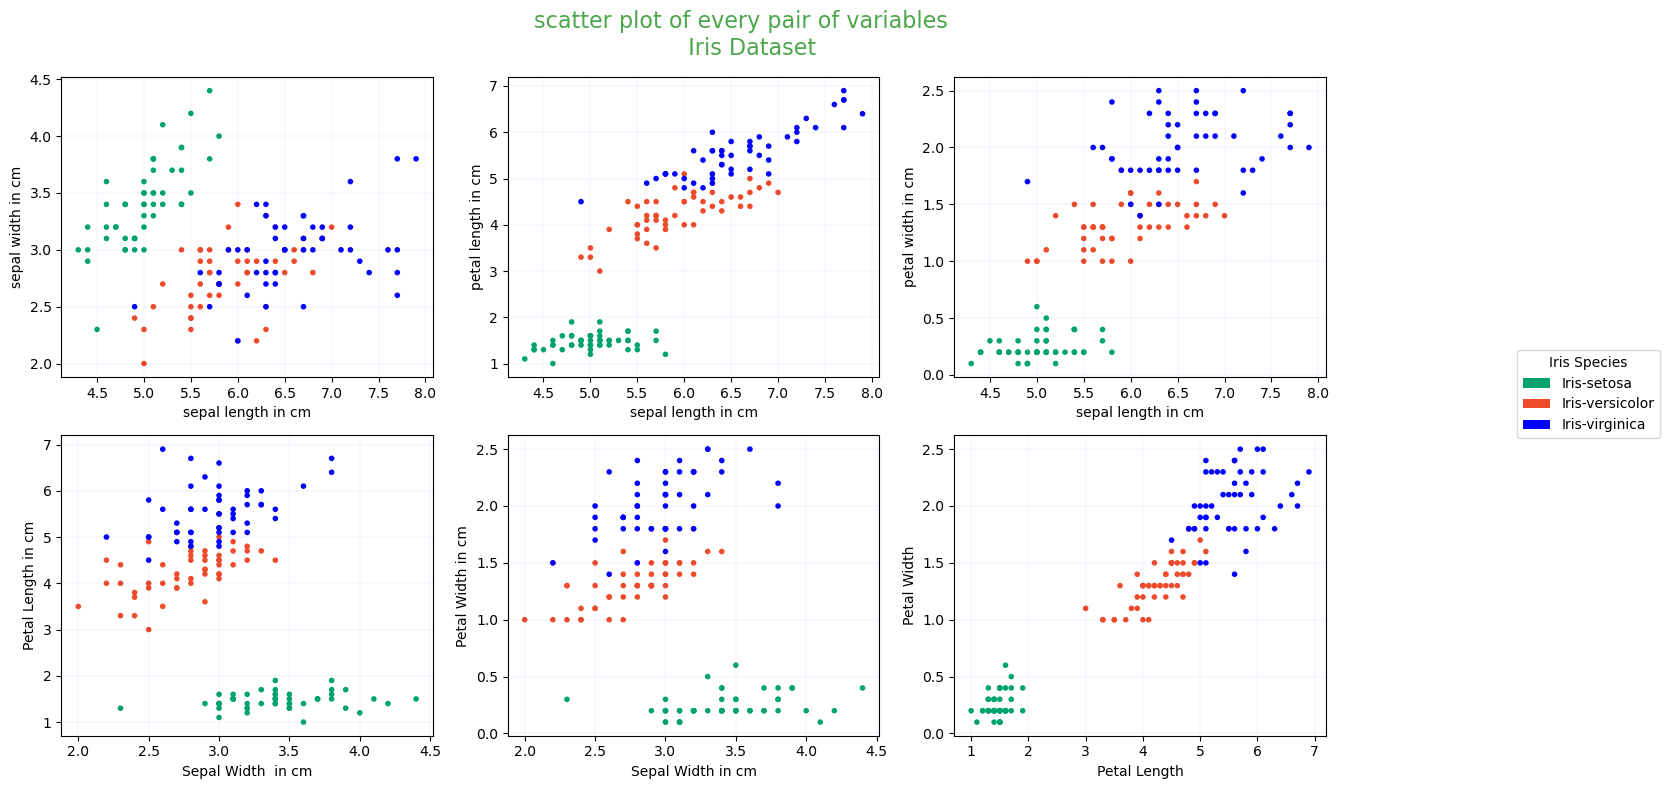

In [38]:
# create a color dictionary
# reference : https://monayo.medium.com/creating-a-scatter-plot-where-points-are-colored-according-to-a-categorical-variable-in-python-c9624be2f39c#:~:text=species%20a%20color-,Dict_colors%20%3D%20%7B%27setosa%27%3A%27blue%27%2C%27versicolor%27%3A%27green%27%2C%27virginica%27%3A%27red%27%7D,-%23map%20species%20to

# assigning colors to species, each specie is coloured differently so it is visually identifiable. 
# reference : https://htmlcolorcodes.com/colors/
species_colors = {
    'Iris-setosa': '#00A36C',
    'Iris-versicolor': '#EE4B2B',
    'Iris-virginica': 'blue'
}

# access the class column , then appply the mapping function which in this case is mapping the species names to colors.
colors = iris_data['class'].map(species_colors)

# create a  grid of 2 rows 3 columns each (6 plots)
# reference : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#:~:text=matplotlib.pyplot.subplots-,matplotlib.pyplot.subplots(nrows%3D1%2C%20ncols%3D1%2C,-*%2C%20sharex
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# cutomizing different parameters of the function 
# fig.suptitle(): a function used in Matplotlib to set the title for a figure
# size=16       : font size
# c='g'         : 'c' stands for Color, and 'g' for Green 
# alpha = 0.7   : controls the transparency of the title text.
fig.suptitle('scatter plot of every pair of variables \n  Iris Dataset', size=16, c='g', alpha = 0.7)

# 1st plot (Scatter plot of Sepal Length vs Sepal Width ) in 1st row, 1st column , with color refernce to iris species
# reference : https://monayo.medium.com/creating-a-scatter-plot-where-points-are-colored-according-to-a-categorical-variable-in-python-c9624be2f39c#:~:text=plt.scatter(iris%5B%27Petal.Length%27%5D%2Ciris%5B%27Sepal.Length%27%5D%2Cc%3Dcolors)
axs[0, 0].scatter(sepal_length, sepal_width, marker='.',  c=colors)
# add a grid for easier reference of point
axs[0, 0].grid(color='blue', linestyle='--', linewidth=0.05)
# set x and y axis labels
axs[0, 0].set_xlabel('sepal length in cm')
axs[0, 0].set_ylabel('sepal width in cm')

# 2nd plot (Scatter plot of Sepal Length vs Petal Length) in 1st row
axs[0, 1].scatter(sepal_length, petal_length, marker='.',  c=colors)
axs[0, 1].grid(color='blue', linestyle='--', linewidth=0.05)
axs[0, 1].set_xlabel('sepal length in cm')
axs[0, 1].set_ylabel('petal length in cm')

# 3rd plot (Scatter plot of Sepal Length vs Petal Width) in 1st row,
axs[0, 2].scatter(sepal_length, petal_width, marker='.',  c=colors)
axs[0, 2].grid(color='blue', linestyle='--', linewidth=0.05)
axs[0, 2].set_xlabel('sepal length in cm')
axs[0, 2].set_ylabel('petal width in cm')

# 1st plot (Scatter plot of Sepal Width vs Petal Length) in 2nd row 
axs[1, 0].scatter(sepal_width, petal_length, marker='.',  c=colors)
axs[1, 0].grid(color='blue', linestyle='--', linewidth=0.05)
axs[1, 0].set_xlabel('Sepal Width  in cm')
axs[1, 0].set_ylabel('Petal Length in cm')

# 2nd plot (Scatter plot of Sepal Width vs Petal Width ) in 2nd row 
axs[1, 1].scatter(sepal_width, petal_width, marker='.',  c=colors)
axs[1, 1].grid(color='blue', linestyle='--', linewidth=0.05)
axs[1, 1].set_xlabel('Sepal Width in cm')
axs[1, 1].set_ylabel('Petal Width in cm')

# 3rd plot (Scatter plot of Petal Length vs Petal Width) in 2nd row,
axs[1, 2].scatter(petal_length, petal_width, marker='.',  c=colors)
axs[1, 2].grid(color='blue', linestyle='--', linewidth=0.05)
axs[1, 2].set_xlabel('Petal Length')
axs[1, 2].set_ylabel('Petal Width')


# create legend handles
# reference : https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
legend_elements = [Patch(facecolor=color, label=label) for label, color in species_colors.items()]

# make room so the legend doesn't overlap.
plt.tight_layout(rect=[0, 0, 0.9, 1])

# add legend to the right of the figure and centers it vertically 
fig.legend(handles=legend_elements, title='Iris Species', loc='center left', bbox_to_anchor=(1.01, 0.5))

# save fig 
plt.savefig("scatter plots of each pair of Iris variables", bbox_inches='tight', dpi=300)


* Analysis of scatter plots  


    - Sepal Length vs Sepal Width   
The data points are spread out indicating a weak or nonexistent correlation. This means, there is no strong pattern, a change in one variable have negligible or no impact on the other variable.

    - Sepal Length vs Petal Length  
As sepal length increases, petal length tends to increase as well. Additionnaly, there is a clear pattern showing in Iris species : 1. Setosa seems short on both sepal length and petal length, Versicolor is in the middle on both sides, Virginica has the highest length of both sepal and petal across 3 species.

    - Sepal Length vs Petal Width  
In this scatter plot, it seems there's a moderate correlation between variables. When sepal length increases the petal width tends to increase too. Setosa stands apart making it visually easy to separate from the other species.

    - Sepal Width vs Petal Length  
The points are spread out across both axes, showing no clear pattern. I see that there is almost no correlation between these 2 variables.

    - Sepal Width vs Petal Width  
There is weak to non existant correlation in this plot. Also, due to lack of a clear pattern, it's difficult to predict the petal width based on the sepal width.

    - Petal Length vs Petal Width  
A change in petal length has a noticeable effect on the petal width, the visual suggests that both variables grow together which indicates a strong positive correlation. When petal length increases, petal width does increase as well.

## 🔸Part 2 - Extended Data Analysis and Interpretation 

---

### 🔹 Pie Plot  
*   Definition of Pie Charts 

A pie chart is a round graph that's divided into slices. Each slice shows a different portion of the data.  
The entire circle represents the whole data which is equivalent to 100%.  

*   Create a pie chart of Iris species count 

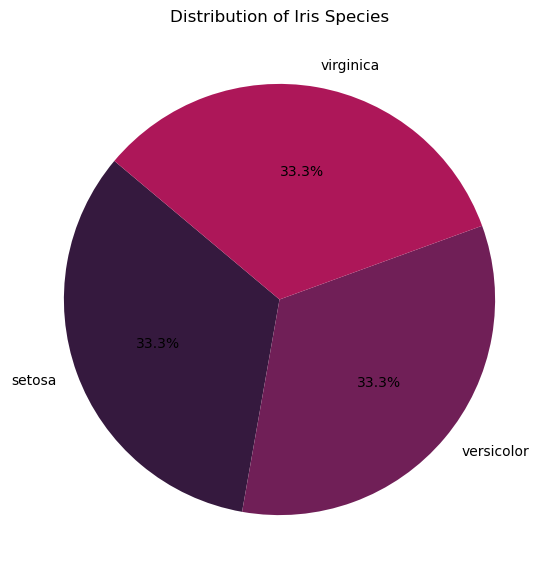

In [39]:
# load the Iris dataset , Seaborn.
iris = sns.load_dataset('iris')

# count the number of instances for each species
# reference : https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
species_counts = iris['species'].value_counts()

# create a pie chart
# reference : https://stackoverflow.com/questions/73616867/pie-chart-from-count-of-values-showing-the-percentage
# reference : https://www.w3resource.com/machine-learning/scikit-learn/iris/python-machine-learning-scikit-learn-iris-visualization-exercise-3.php
# reference : https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

# create a figure
plt.figure(figsize=(8, 7))
# plot 
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('rocket'))
# add title
plt.title('Distribution of Iris Species')
# save fig
plt.savefig("pie plot of iris species count")

*   Analysis of Pie chart  

This pie chart shows the distribution of the three Iris species in the dataset: Setosa, Versicolor, and Virginica.  
Each slice represents a species and together they make up 100% of the dataset.  
Every slice represents 33.3% of the data, this means, the data set contains an equal number of samples from each IRIS species.  

---

### 🔹 Boxplots

*   Definition of Boxplots

A boxplot is a chart that shows how numbers are spread out in a group.  
It includes five key values which are : the minimum, first quartile, median, third quartile and maximum.  
The box represents where most of the numbers are grouped, and a horizontal line inside the box shows the median.  

*   Create Boxplots  


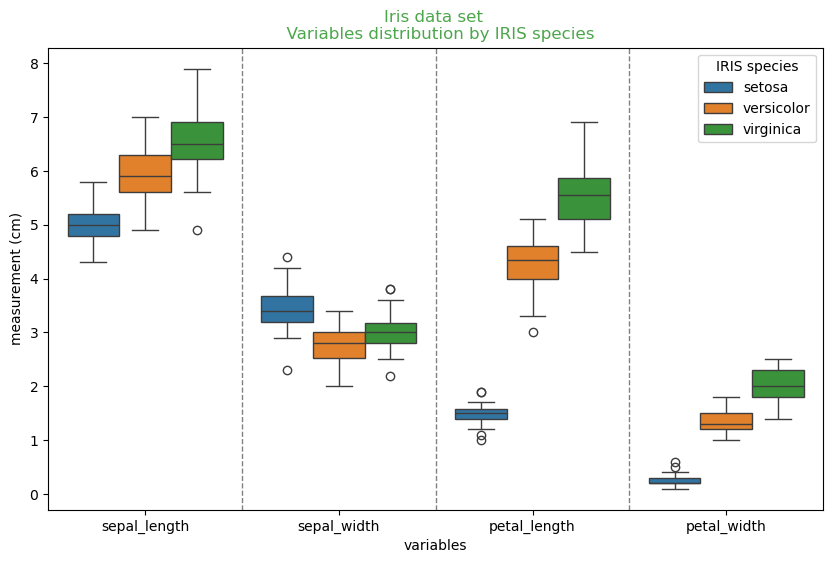

In [40]:
# learn the Seaborn pairplot method
# reference : https://seaborn.pydata.org/generated/seaborn.pairplot.html
# reference : https://www.geeksforgeeks.org/python-seaborn-pairplot-method/

# in the official documentation page, it is advised to load a .csv format dataset file.
# the same page refers to a using a repository containing sample datasets provided by Seaborn. The Iris dataset is in that list, which makes it a convenient target for the seaborn.load_dataset function.
# reference : https://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset:~:text=%7Bname%7D.csv-,on%20https%3A//github.com/mwaskom/seaborn%2Ddata).,-cacheboolean%2C%20optional

# Seaborn library is previously imported (as sns).
# load dataset
iris_ds = sns.load_dataset('iris')

# melt the dataframe to long format, meaning, I need to convert the columns to rows.
# reference : https://pandas.pydata.org/docs/reference/api/pandas.melt.html
# reference : https://datascientyst.com/use-melt-pandas-dataframe-pd-melt-examples/
iris_melted = pd.melt(iris_ds, id_vars='species', var_name='feature', value_name='measurement')

# create the boxplot
plt.figure(figsize=(10, 6))
# reference : https://stackoverflow.com/questions/58576394/plotting-boxplot-with-sns#:~:text=sns.boxplot(x%3D%27value%27%2C%20y%3D%22X%22%2C%20data%3Ddata_st%2Chue%3Dy%2Cpalette%3D%27Set1%27)
# each color in the box refers to an iris species. The color-coded boxes represent the interquartile range (middle data or 50%), while the lines (whiskers) show overall spread. The horizontal line inside each box is the median.
# Q1 (25th percentile) is the line, shown at the bottom edge of the box, Q3 (75th percentile) is the line shown at the top edge of the box
sns.boxplot(x='feature', y='measurement', hue='species', data=iris_melted)

# draw vertical lines to separate iris data set variables visually. 
# reference : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html#:~:text=draw%20a%20default%20vline%20at%20x%20%3D%20.5,%3E%3E%3E
for x in [0.5,1.5,2.5]: 
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=1)

# add title
plt.title('Iris data set \n  Variables distribution by IRIS species', c='g', alpha =0.7)
# set x and y labels
plt.xlabel('variables')
plt.ylabel('measurement (cm)')
# add meaningful legend
plt.legend(title='IRIS species')

# save
plt.savefig("box plots of Iris species variables")

*   Analysis of Boxplots  

These boxplots provide a summary of the distribution of 4 Iris features  across 3 IRIS species.  

Each boxplot show the median, the Quartiles Q1 , Q2 and Q3, then whiskers which represent the variability of the minimum value, maximum value, and any outlier data points in the range of data.   

-The horizontal line in the middle of each box refers to the median of the values in each variable range.  

**Setosa** boxplots show :  
-the smallest petal length and width.  
-wider sepal width compared to the other species.  
-shorter sepal length than both Virginica and Versicolor.  

**Versicolor** :  
-falls between Setosa and Virginica approximately through all the features.  

**Virginica** boxplots show :  
-the highest measurments for petal length, petal width and sepal length , but its sepal width is located in between of the other species.  

This boxplot helps to tell the 3 Iris species apart based on the features measurments : petal length and petal width.  



---



### 🔹 Heatmaps

*   Definition of Heatmaps

The heatmap is a graphical representation of data where individual values are represented by color intensity.  

In the heatmap, each row and column represent a numerical variable ,and, each cell depicts the relationship between the intersecting 
variables (their correlation).  

*   Definition of correlation coefficients  

Correlation reveals how variations in one variable are connected to variations in another.    
The correlation coefficients range from negative one to  one, where :   

*Negative one (-1) indicates a strong negative relationship (as one variable increases, the other decreases)  
*One (1) indicates a strong positive relationship (as one variable increases, the other also increases)  
*Zero (0) indicates no relationship (the change of one variable is not related to the change of the other)  

This pattern remains consistent in heatmaps: darker values always indicate higher magnitudes than lighter ones.  

*   Create Heatmap for each Iris species   

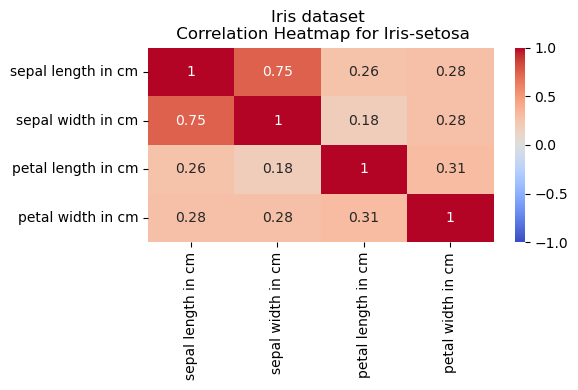

<Figure size 640x480 with 0 Axes>

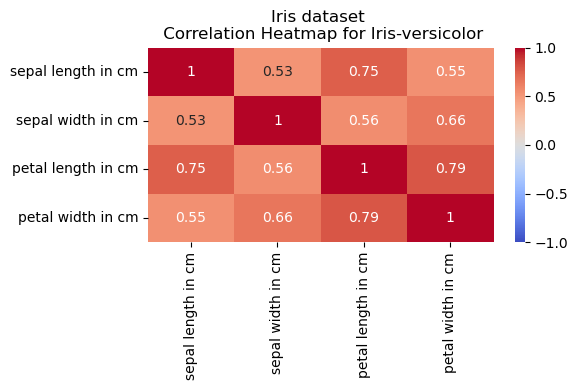

<Figure size 640x480 with 0 Axes>

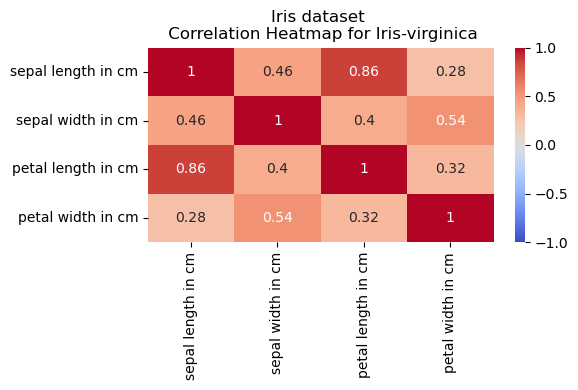

<Figure size 640x480 with 0 Axes>

In [41]:
# reference  : The code was initially proposed by microsoft Copilot (AI) (generated on Bing browser search bar ), I had this idea of generating unique heatmaps of each iris species, but was unable to find approximate code through my usual sources
# prompt used: "simplified Python code to create individual correlation heatmaps for each of the three Iris species.", the code then was updated using 'class'(column name) instead of 'species' 

# identify the list of species ['setosa', 'versicolor', 'virginica']
species_list = iris_data['class'].unique() 

# loop through each species
for sp in species_list:
    # filter the dataset to only save rows of the actual species
    subset = iris_data[iris_data['class'] == sp]
    # calculate the correlation matrix
    corr = subset.drop('class', axis=1).corr()

    # plot heatmap  
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Iris dataset \n Correlation Heatmap for {sp.capitalize()}')
    plt.tight_layout()


    # save figure
    filename = f'heatmap correlation of {sp.lower()}.png'
    plt.savefig(filename, dpi=300)

    #show
    plt.show()
    
    #  plot to avoid overlap
    plt.clf()

  
  


*   Analysis of Heatmaps

You can see in the above heatmap that values high value that is close to 1 are represented with dark color and values with smaller value are represented with light color.



**Setosa**
a strong positive correlation of 0.75 ( close to 1) between sepal length and sepal width, which means that when one feature increases the other tends to increase as well.

**Versicolor**
the petal length and petal width show a strong positive correlation of 0.79, meaning these features increase together. Similarly, petal length and sepal length have a correlation of 0.75 which suggest a strong positive relationship between these two features. 

**Virginica**  
petal length and sepal length are strongly positively correlated (0.86), meaning both features tend to grow together.


---

### 🔹 Pairplots :


*   Pairplots definition  

'Seaborn Pairplot is a Python data visualization library that allows to plot pairwise relationships between variables within a dataset, making it easier to visualize and understand large data sets.
By default, the function will create a grid of Axes such that each numeric variable in data will be shared across the y-axes across a single row and the x-axes across a single column.
The diagonal plots are treated differently. As univariate distribution plot, it's drawn to show the marginal distribution of the data in each column.'

Source [***Seaborn***](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

* Create pairplots

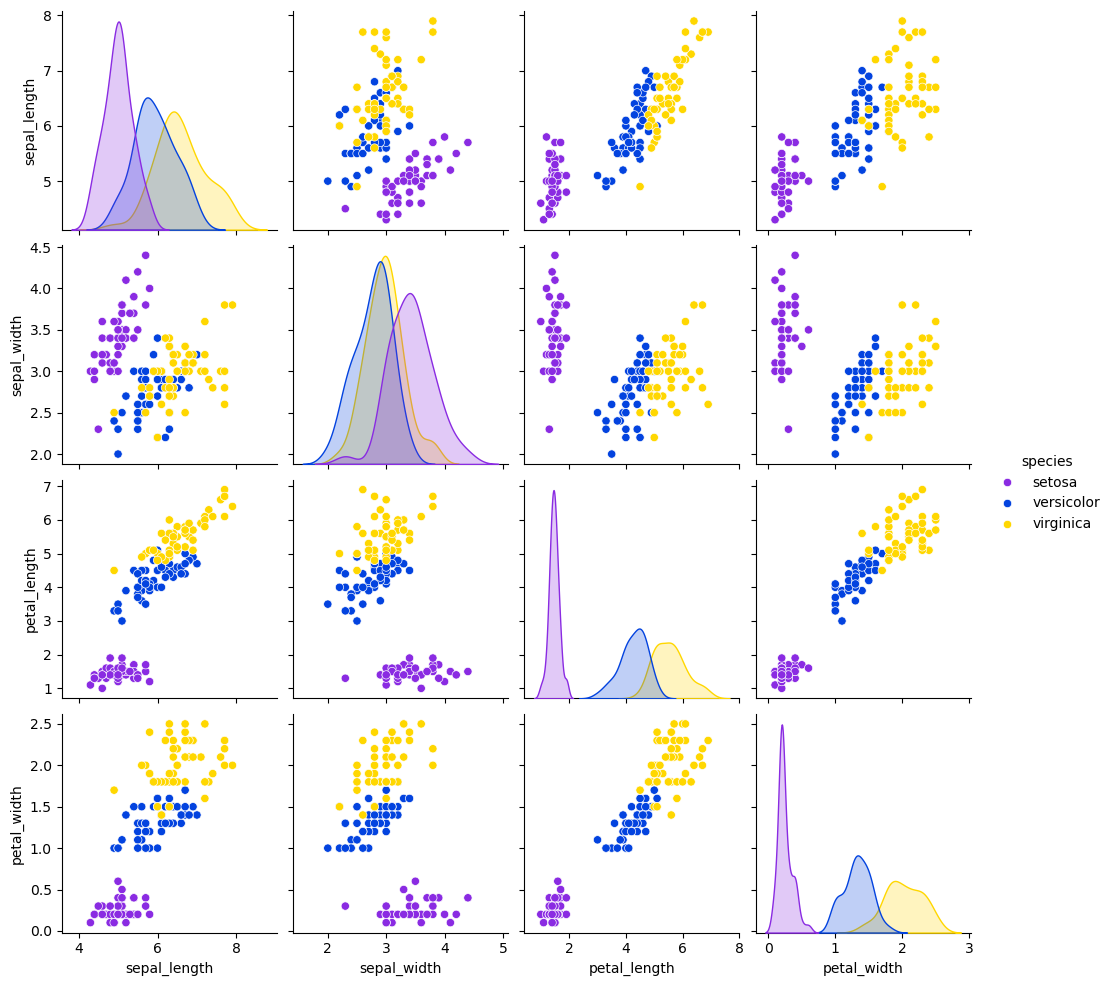

In [42]:
# documentation
# link: https://seaborn.pydata.org/generated/seaborn.pairplot.html  

# learn the Seaborn pairplot method
# reference : https://seaborn.pydata.org/generated/seaborn.pairplot.html
# reference : https://www.geeksforgeeks.org/python-seaborn-pairplot-method/
# sns.pairplot(data, *, hue=None, .. )

# in the official documentation page, it is advised to load a .csv format dataset file.
# reference : https://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset:~:text=Parameters%3A,%7Bname%7D.csv.
# the same documentation page refers to a a repository containing sample datasets provided by Seaborn. The Iris dataset is in that list, which makes it a convenient target for the seaborn.load_dataset function.
# reference : https://seaborn.pydata.org/generated/seaborn.load_dataset.html#:~:text=https%3A//github.com/mwaskom/seaborn%2Ddata).
# reference : https://github.com/mwaskom/seaborn-data

# load Iris dataset using seaborn.load_dataset() method, which allows users to quickly load sample datasets provided by Seaborn. 

# Seaborn library is previously imported (as sns).
iris_data = sns.load_dataset('iris')

# visualize using pairplot
# I used the palette parameter and selected colors from the list in link below, to distinguish between Iris species
# reference : https://seaborn.pydata.org/generated/seaborn.xkcd_palette.html#:~:text=See%20xkcd%20for%20the%20full%20list%20of%20colors%3A%20https%3A//xkcd.com/color/rgb/
# reference : https://xkcd.com/color/rgb/
sns.pairplot(iris_data, hue='species', palette=['#8A2BE2', '#0343df', '#FFD700'])

plt.savefig("pairplot of pairwise relationships of Iris variables")

*   Analysis of pairplots  

I split the analysis into 2 parts :  

This pairplot shows pairwise of relationships between multiple variables in a dataset, without distinguishing between Iris species.   

The grid contains 12 scatter plots, showing how 2 variables are related.  
After removing repeated scatter plots, I did reduce the visualized relationships between the Iris dataset variables to 6 distinct plots.( see scatter plots task for analysis and explanation how to find pairs combinations).  

*   Explain distribution using KDE  

The density plots (diagonal plots) also known as marginal distribution, are treated differently, they show the distribution of a single variable alone, while combined with the scatter plots, they provide a powerful tool for multivariate exploration.  

Sepal length: Setoasa shows the highes peak while Versicolor and Virginica have a higher standard deviation, based on their wider curves.

Sepal width:The distributions are similar which explains the overlap between all Iris species. Using this variable alone is not helpful to compare the species.

Petal length: Petal length makes a clear difference between the species, especially with Setosa which has much shorter petals and Virginica having the longest.

Petal width: Setosa shows the narrowest range of petal width compared to Virginica whish seems to have wider petals.

Pairplot is an interesting data visualization tool, it allows to have a global understanding of how variables interact with each other.
It can be used to compare different variables, identify correlations and in exploring more relationships that might be overlooked when using individual analysis methods.

As a conclusion, based on this analysis, I can confirm that petal length and width are closely linked.
This strong connection contributes significantly to the identification of iris species.

End